In [36]:
import pandas as pd

location = "/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias"

diapause = pd.read_csv(f"{location}/2.ERC_plot/ERC_correlation_non_diapause_longform.csv")

# genes = ["8751at7088","period","3165at7088","3811at7088","4043at7088","13263at7088","12510at7088","2560at7088","8809at7088","1846at7088","5474at7088","5423at7088","3362at7088","1709at7088","2036at7088","5326at7088","10001at7088","4842at7088","6081at7088","1390at7088","cycle","8044at7088","16035at7088","12354at7088","12730at7088","1422at7088","6031at7088","5679at7088"]

# genes = ["8751at7088","period","3165at7088","3811at7088","4043at7088","8809at7088","12510at7088","13263at7088","1846at7088","5423at7088","3362at7088","1709at7088","5474at7088","2560at7088","2036at7088","5326at7088","cycle","10001at7088","1390at7088","8044at7088","6081at7088","16035at7088","4842at7088","5679at7088","1422at7088"]

# genes = ["5423at7088","2036at7088","3811at7088","2560at7088","cycle","16035at7088","10001at7088","8751at7088","6081at7088","3165at7088","period","5326at7088","1390at7088","1846at7088","1422at7088","5474at7088","5679at7088","8809at7088","1709at7088","4842at7088","8044at7088","3362at7088","12510at7088","13263at7088","4043at7088"]

#just Cluster
genes = ['3811at7088', '5679at7088', '8044at7088', '5423at7088', '12510at7088', '6081at7088', 'period', '1422at7088', '1846at7088', '2036at7088', 'cycle', '5474at7088', '3362at7088', '1709at7088']

location = "/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/unTrimmed/3.For_tree"
gene_anno_dic = {}
with open(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/20.RERconverge/2.Modified_diapause/correlation_with_annotation.csv", 'r') as cor_file:
    for lines in cor_file.readlines()[1:]:
        gene_name = lines.split(",")[0].split("_")[0]
        # print(gene_name)
        anno_name = lines.split(",")[-1].replace('"', '')
        gene_anno_dic[gene_name]= anno_name.strip()

filtered_df = diapause[diapause['Gene1'].isin(genes)& diapause['Gene2'].isin(genes)]


filtered_df = filtered_df.rename(columns={"value": "Correlation"})

def check_annotation(name):
    return gene_anno_dic.get(name, name)

filtered_df["Annotation_gene1"] = filtered_df["Gene1"].apply(check_annotation)
filtered_df["Annotation_gene2"] = filtered_df["Gene2"].apply(check_annotation)


# filtered_df = filtered_df.drop('Unnamed: 0', axis=1)
filtered_df["Correlation"].fillna(1, inplace=True)


filtered_df_can_list_pivot = filtered_df.pivot(index="Annotation_gene1", columns="Annotation_gene2", values="Correlation")

filtered_df_can_list_pivot = filtered_df_can_list_pivot.fillna(1)



In [37]:
df_filtered = filtered_df[(filtered_df['Correlation'] >= 0.40) &  (filtered_df['Correlation'] < 1)]


print(df_filtered)



               Gene1       Gene2  Correlation Annotation_gene1  \
2347031   5474at7088      period     0.669937            CLOCK   
2348401   5474at7088       cycle     0.411404            CLOCK   
4029451   1846at7088  6081at7088     0.450881          SLC6A19   
10567643      period  5474at7088     0.669937           period   
10570812      period       cycle     0.441086           period   
12565364  6081at7088  1846at7088     0.450881       6081at7088   
16829380       cycle  5474at7088     0.411404            cycle   
16831179       cycle      period     0.441086            cycle   

         Annotation_gene2  
2347031            period  
2348401             cycle  
4029451        6081at7088  
10567643            CLOCK  
10570812            cycle  
12565364          SLC6A19  
16829380            CLOCK  
16831179           period  


In [38]:
import pandas as pd
import networkx as nx

# Assuming your DataFrame is called df
# Optionally filter for strong correlations
threshold = 0.40
# df_filtered = df[df['Correlation'] > threshold]

# Create a graph
G = nx.Graph()
# for _, row in df_filtered.iterrows():
#     G.add_edge(row['Annotation_gene1'], row['Annotation_gene2'], weight=row['Correlation'])

for _, row in df_filtered.iterrows():
    G.add_edge(row['Gene1'], row['Gene2'], weight=row['Correlation'])

# Find connected components (clusters)
clusters = list(nx.connected_components(G))

# Print clusters
for i, cluster in enumerate(clusters, 1):
    print(f"Cluster {i}: {cluster}")

Cluster 1: {'period', 'cycle', '5474at7088'}
Cluster 2: {'6081at7088', '1846at7088'}


AttributeError: 'ClusterGrid' object has no attribute 'set_xticklabels'

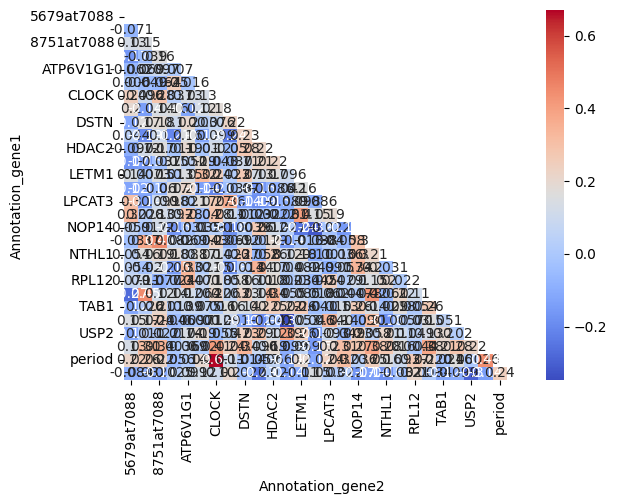

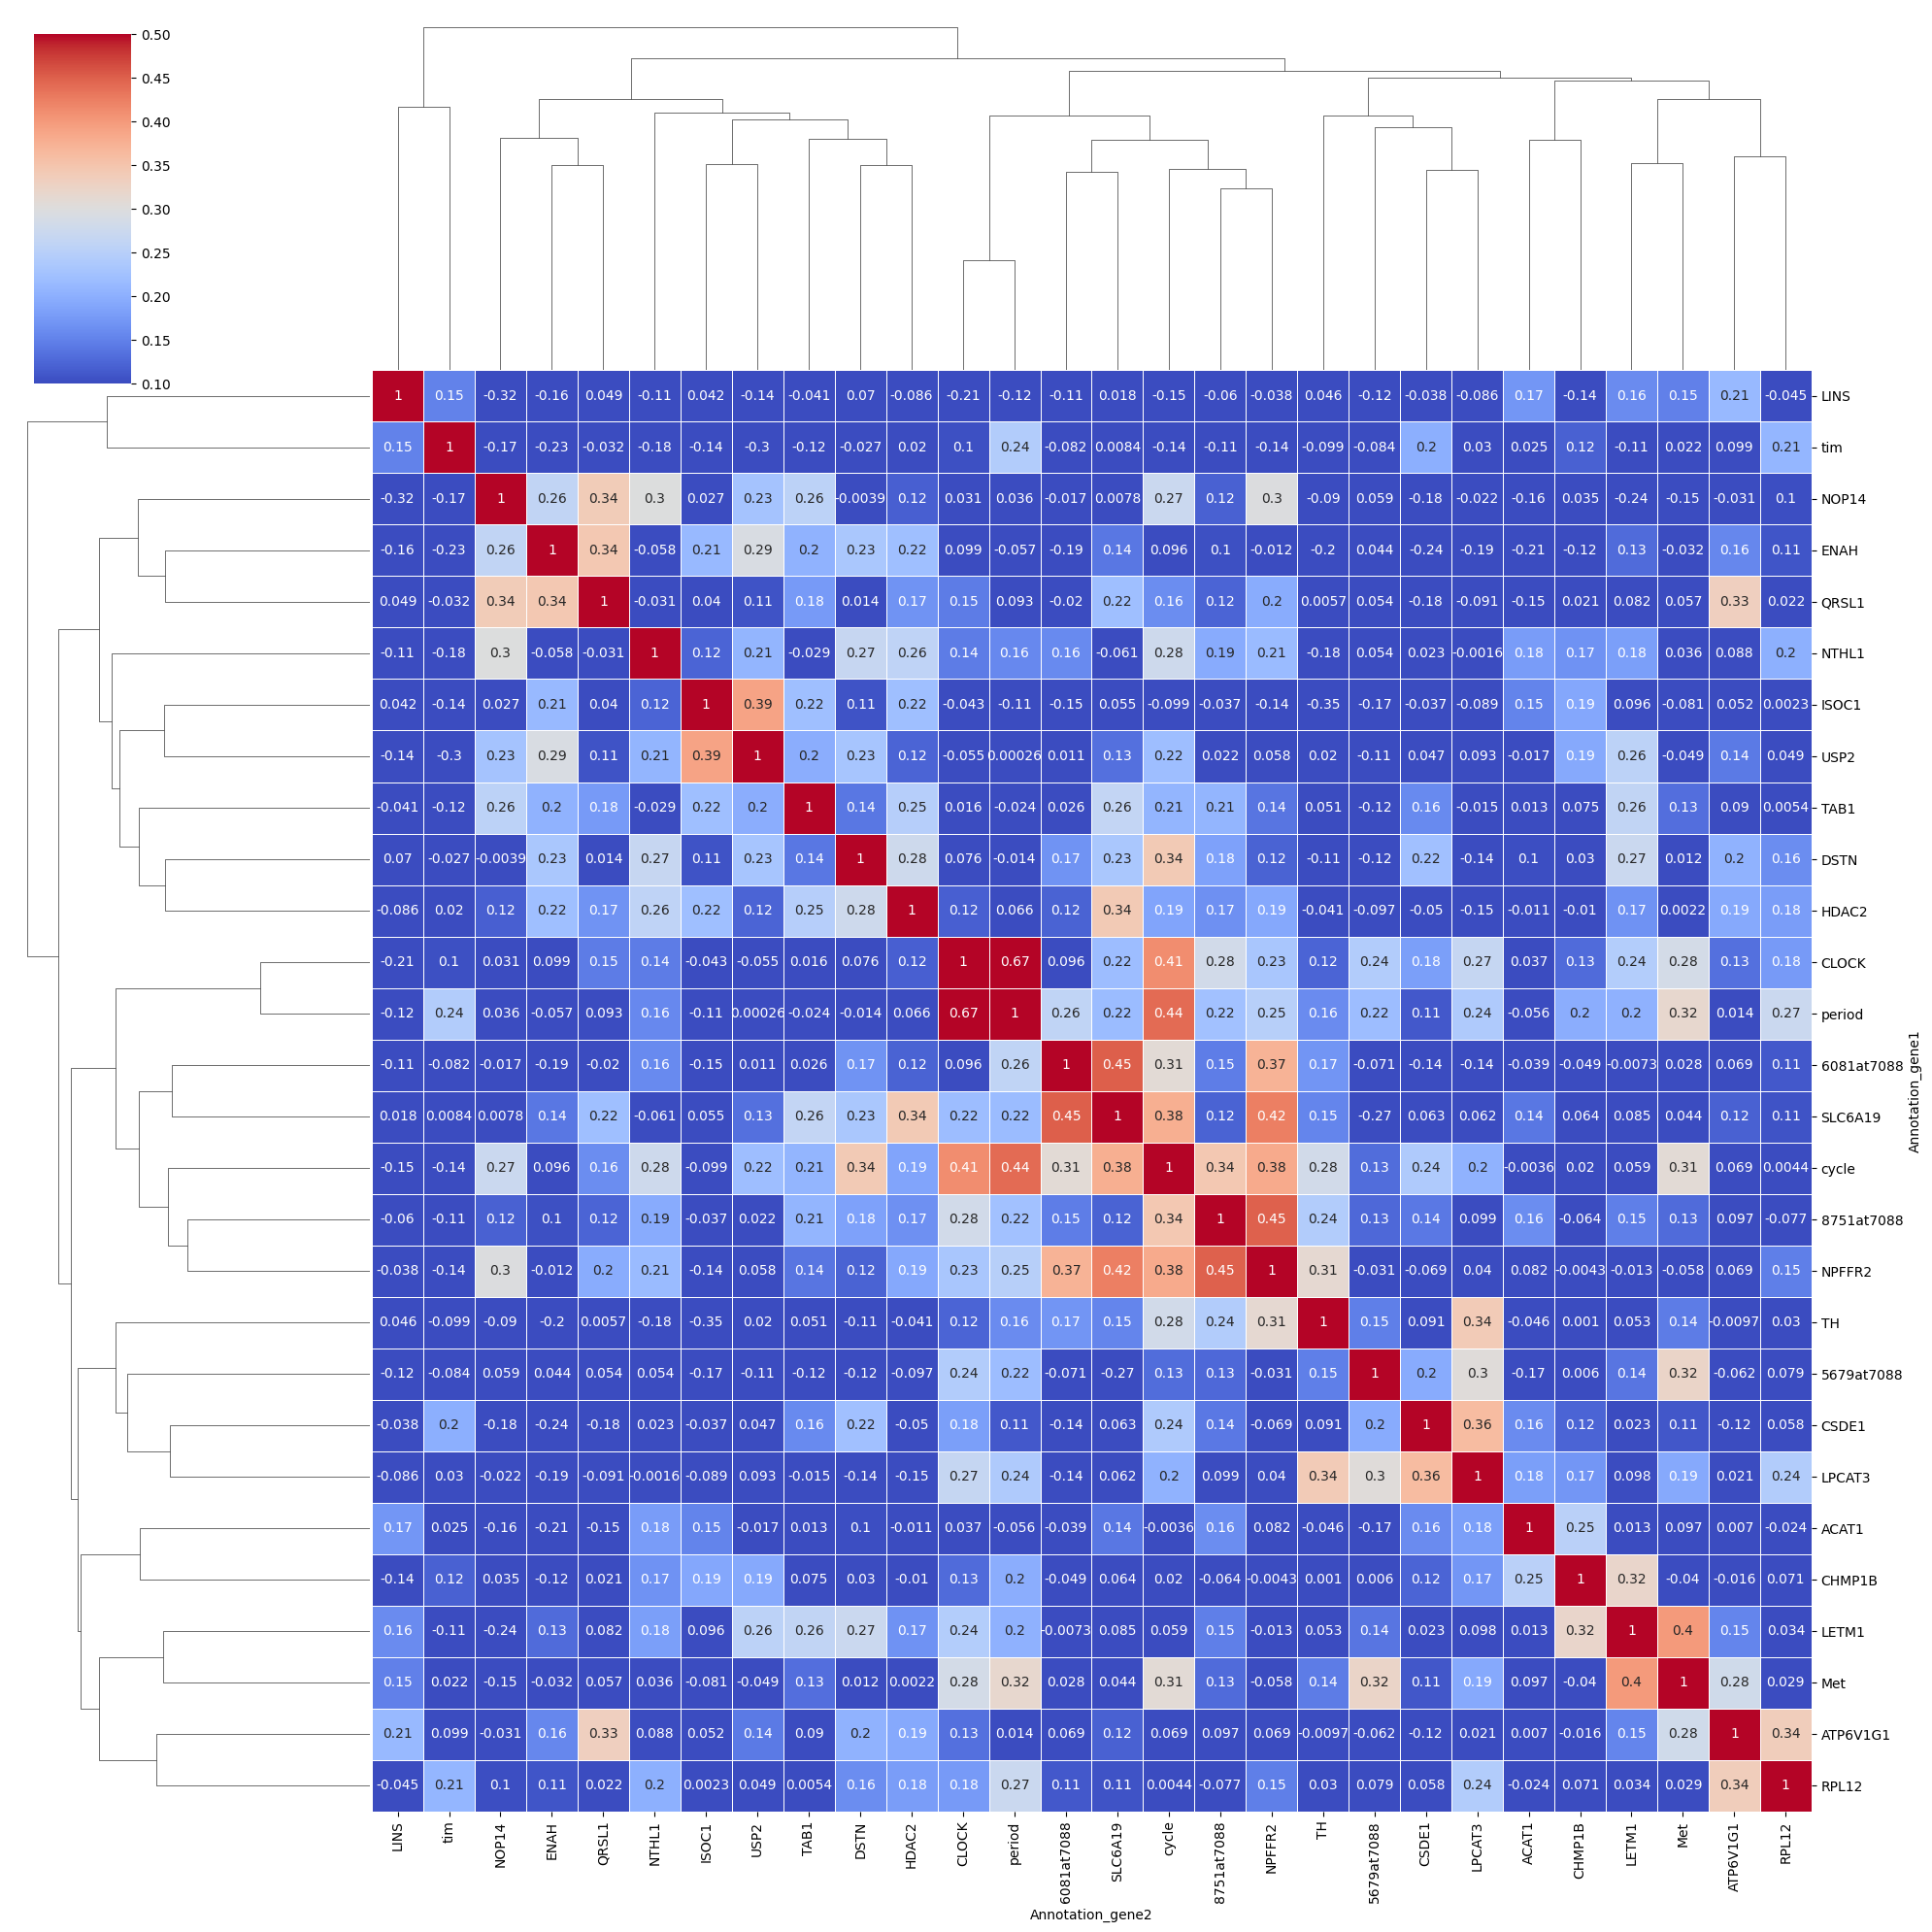

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# mask =np.triu(np.ones_like(filtered_df_can_list_pivot, dtype=bool))

# Create clustered heatmap with masking
# 
# sns.clustermap(filtered_df_can_list_pivot, cmap="coolwarm", annot=True,mask=mask, linewidths=0.5, figsize=(8, 6))


mask = np.triu(np.ones_like(filtered_df_can_list_pivot, dtype=bool))
# plt.figure(figsize=(8, 8))

ax = sns.heatmap(filtered_df_can_list_pivot, mask=mask, annot=True, cmap='coolwarm', cbar=True)

ax = sns.clustermap(filtered_df_can_list_pivot, cmap="coolwarm", vmin=0.1, vmax=0.5, annot=True, linewidths=0.5, figsize=(20, 20))

# ax.savefig("/mnt/g/My Drive/Circadian Rhythm Genes Project/61.New_alignment_colias/2ERC_plot from  old/clustermap_output.pdf", format="pdf", bbox_inches='tight')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')  # Vertical x-axis labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right') 

ax.set_xlabel("Gene 1", fontsize=12)
ax.set_ylabel("Gene 2", fontsize=12)

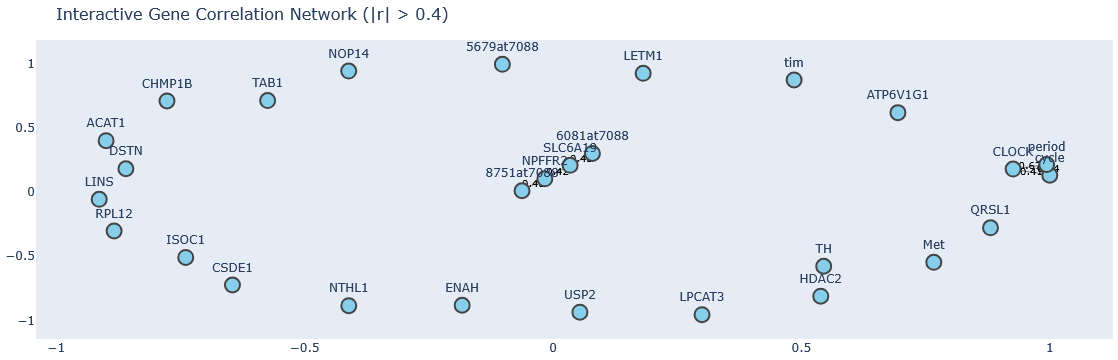

In [12]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

# Load the correlation matrix
df = filtered_df_can_list_pivot

# Create graph with thresholded edges
G = nx.Graph()
G.add_nodes_from(df.columns)
threshold = 0.4

for i in range(len(df)):
    for j in range(i+1, len(df.columns)):
        gene1 = df.index[i]
        gene2 = df.columns[j]
        weight = df.iloc[i, j]
        if abs(weight) >= threshold:
            G.add_edge(gene1, gene2, weight=weight)

# Generate layout
pos = nx.spring_layout(G, seed=42)

# Extract node and edge positions
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

# Edge traces
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='gray'),
    hoverinfo='none',
    mode='lines'
)

# Node traces
node_x = []
node_y = []
node_text = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_text,
    textposition="top center",
    hoverinfo='text',
    marker=dict(
        showscale=False,
        color='skyblue',
        size=15,
        line_width=2
    )
)



edge_label_x = []
edge_label_y = []
edge_label_text = []

for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    mid_x = (x0 + x1) / 2
    mid_y = (y0 + y1) / 2
    edge_label_x.append(mid_x)
    edge_label_y.append(mid_y)
    edge_label_text.append(f"{edge[2]['weight']:.2f}")

# Scatter trace for edge labels
edge_label_trace = go.Scatter(
    x=edge_label_x,
    y=edge_label_y,
    text=edge_label_text,
    mode='text',
    textfont=dict(color='black', size=10),
    hoverinfo='none',
    showlegend=False
)

# Build the figure
# fig = go.Figure(data=[edge_trace, node_trace],
#     layout=go.Layout(
#         title=dict(
#             text='Interactive Gene Correlation Network (|r| > 0.6)',
#             font=dict(size=16)
#         ),
#         showlegend=False,
#         hovermode='closest',
#         margin=dict(b=20, l=5, r=5, t=40),
#         xaxis=dict(showgrid=False, zeroline=False),
#         yaxis=dict(showgrid=False, zeroline=False)
#     )
# )


fig = go.Figure(data=[edge_trace, edge_label_trace, node_trace],
    layout=go.Layout(
        title=dict(
            text=f'Interactive Gene Correlation Network (|r| > {threshold})',
            font=dict(size=16)
        ),
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False)
    )
)

fig.show()
location = "/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias"
fig.write_html(f"{location}/3.ERC_network/correlation_network_non_diapause_{threshold}.html")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 56403.86it/s]

BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


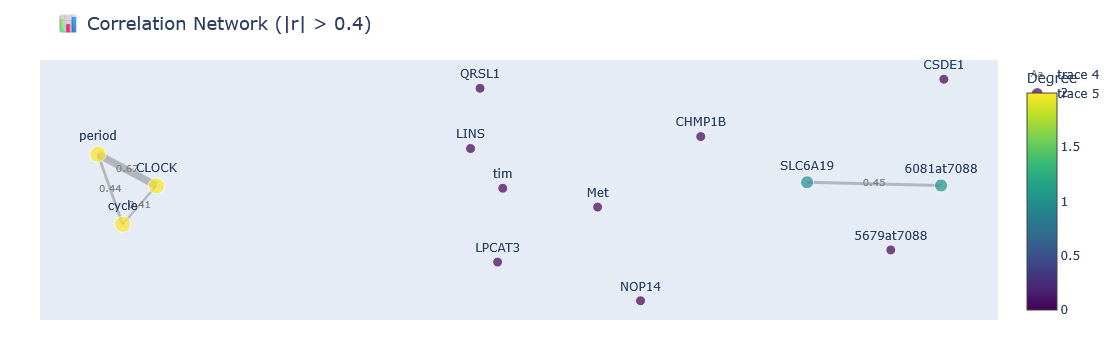

In [39]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

# Load correlation matrix
df = filtered_df_can_list_pivot

# Create graph
G = nx.Graph()
G.add_nodes_from(df.columns)  # Include all nodes

# Add edges with correlation threshold
threshold = 0.4
for i in range(len(df)):
    for j in range(i+1, len(df.columns)):
        gene1 = df.index[i]
        gene2 = df.columns[j]
        weight = df.iloc[i, j]
        if abs(weight) >= threshold:
            G.add_edge(gene1, gene2, weight=weight)

# Layout
from fa2 import ForceAtlas2

import networkx as nx
if not hasattr(nx, 'to_scipy_sparse_matrix'):
    nx.to_scipy_sparse_matrix = nx.to_scipy_sparse_array

# ForceAtlas2 setup
forceatlas2 = ForceAtlas2(
    outboundAttractionDistribution=True,
    linLogMode=False,
    adjustSizes=False,
    edgeWeightInfluence=1.0,
    jitterTolerance=1.0,
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=1.0,
    verbose=True
)

# Generate positions
pos = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=500)


# --- Edge traces ---
edge_x, edge_y, edge_color, edge_width, edge_text = [], [], [], [], []

for u, v, d in G.edges(data=True):
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]
    edge_color.append('red' if d['weight'] > 0 else 'blue')
    edge_width.append(2 + 4 * abs(d['weight']))  # Scale line thickness
    edge_text.append(f"{u} ↔ {v}<br>r = {d['weight']:.2f}")
    edge_text.append(None)
    edge_text.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='gray'),  # base edge styling
    hoverinfo='none',
    mode='lines'
)

edge_traces = []

for i, (u, v, d) in enumerate(G.edges(data=True)):
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    weight = d['weight']
    # edge_color = 'red' if weight > 6 else 'blue'
    edge_color = "rgba(105,105,105, 0.4)"
    width = 20 * abs(weight-0.3)
    # print(width)
    trace = go.Scatter(
        x=[x0, x1, None],
        y=[y0, y1, None],
        mode='lines',
        line=dict(width=width, color=edge_color),
        hoverinfo='text',
        text=[f"{u} ↔ {v}<br>r = {weight:.2f}", None, None],
        showlegend=False
    )
    edge_traces.append(trace)

# --- Edge labels ---
edge_label_x, edge_label_y, edge_label_text = [], [], []

for u, v, d in G.edges(data=True):
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    mid_x = (x0 + x1) / 2
    mid_y = (y0 + y1) / 2
    edge_label_x.append(mid_x)
    edge_label_y.append(mid_y)
    edge_label_text.append(f"{d['weight']:.2f}")

edge_label_trace = go.Scatter(
    x=edge_label_x, y=edge_label_y,
    text=edge_label_text,
    mode='text',
    textfont=dict(color='gray', size=10),
    hoverinfo='none'
)

# --- Node traces ---
node_x, node_y, node_text, node_color, node_size = [], [], [], [], []

for node in G.nodes():
    x, y = pos[node]
    degree = G.degree[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(f"{node}<br>degree: {degree}")
    node_color.append(degree)
    node_size.append(10 + 3 * degree)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=[node for node in G.nodes()],
    textposition="top center",
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='Viridis',
        color=node_color,
        size=node_size,
        line_width=1,
        colorbar=dict(title='Degree')
    )
)

# --- Final figure ---
fig = go.Figure(
    # data=[edge_trace, edge_label_trace, node_trace],
    data=edge_traces + [edge_label_trace, node_trace],
    layout=go.Layout(
        title=dict(
            text=f"📊 Correlation Network (|r| > {threshold})",
            font=dict(size=18)
        ),
        margin=dict(l=40, r=40, b=40, t=60),
        hovermode='closest',
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    )
)

fig.show()
location = "/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias"
fig.write_html(f"{location}/3.ERC_network/correlation_network_non_diapause_{threshold}_col_new_new.html")

In [18]:
!mamba install fa2

warning  libmamba 'repo.anaconda.com', a commercial channel hosted by Anaconda.com, is used.
    
warning  libmamba Please make sure you understand Anaconda Terms of Services.
    
warning  libmamba See: https://legal.anaconda.com/policies/en/
warning  libmamba 'repo.anaconda.com', a commercial channel hosted by Anaconda.com, is used.
    
warning  libmamba Please make sure you understand Anaconda Terms of Services.
    
warning  libmamba See: https://legal.anaconda.com/policies/en/
warning  libmamba 'repo.anaconda.com', a commercial channel hosted by Anaconda.com, is used.
    
warning  libmamba Please make sure you understand Anaconda Terms of Services.
    
warning  libmamba See: https://legal.anaconda.com/policies/en/
warning  libmamba 'repo.anaconda.com', a commercial channel hosted by Anaconda.com, is used.
    
warning  libmamba Please make sure you understand Anaconda Terms of Services.
    
warning  libmamba See: https://legal.anaconda.com/policies/en/
[+] 0.0s
[+] 0.0s
[+] 0.

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 28581.68it/s]

BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds
